This project consists of several classification techniques in machine learning such as Decision tree,Naive Bayes,SVM,Linear Regression,Logistic Regression,KNN,Adaboost,Quadratic Discriminant Analysis on bike buyer's dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/bike_buyers_clean (1).csv')


## Basic EDA

In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute,Region,Age,Purchased
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
df.tail()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute,Region,Age,Purchased
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No
999,12121,Single,Male,60000,3,High School,Professional,Yes,2,10+ Miles,North America,53,Yes


In [ ]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [ ]:
df.shape

(1000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1000 non-null   int64 
 1   Marital Status  1000 non-null   object
 2   Gender          1000 non-null   object
 3   Income          1000 non-null   int64 
 4   Children        1000 non-null   int64 
 5   Education       1000 non-null   object
 6   Occupation      1000 non-null   object
 7   Home Owner      1000 non-null   object
 8   Cars            1000 non-null   int64 
 9   Commute         1000 non-null   object
 10  Region          1000 non-null   object
 11  Age             1000 non-null   int64 
 12  Purchased       1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [ ]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute', 'Region', 'Age',
       'Purchased'],
      dtype='object')

In [ ]:
df.isnull().sum()   #no null values

ID                0
Marital Status    0
Gender            0
Income            0
Children          0
Education         0
Occupation        0
Home Owner        0
Cars              0
Commute           0
Region            0
Age               0
Purchased         0
dtype: int64

In [ ]:
df.shape

(1000, 13)

In [ ]:
df[df.duplicated()]  #no duplicates present

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute,Region,Age,Purchased


In [ ]:
plt.figure(figsize=(15,12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

## Finding Outliers

<Axes: >

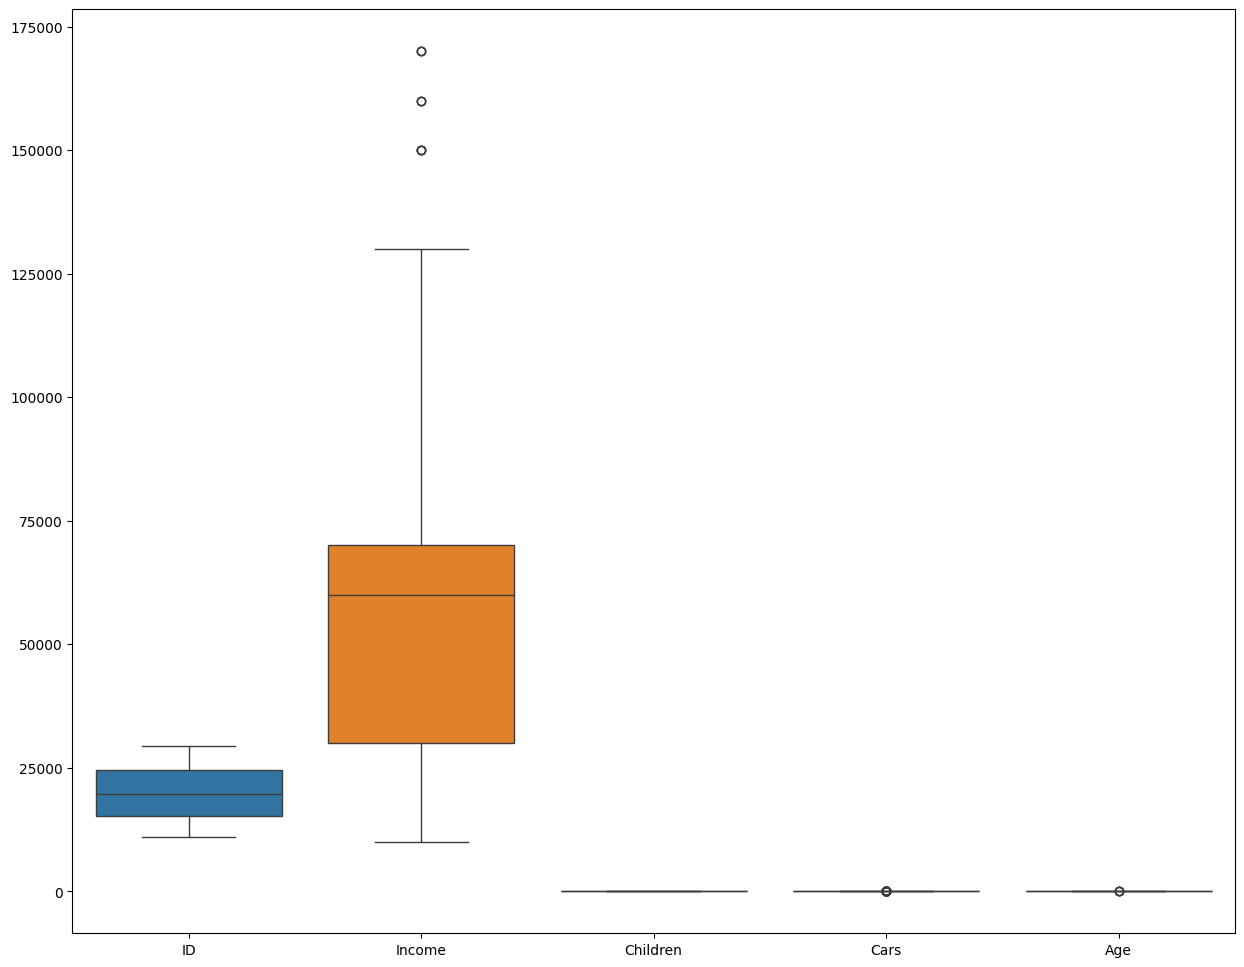

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[['ID','Income','Children','Home Owner','Cars','Commute','Age']])

In [ ]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)


    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)


    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['Income','Children','Cars','Age']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Income attribute : [150000, 150000, 150000, 150000, 160000, 160000, 160000, 170000, 170000, 170000]
Outliers in Children attribute : []
Outliers in Cars attribute : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Outliers in Age attribute : [78, 78, 80, 89]


In [ ]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['Income','Children','Cars','Age']:
    df[i]=handle_outliers(df[i])

Checking for outliers

<Axes: >

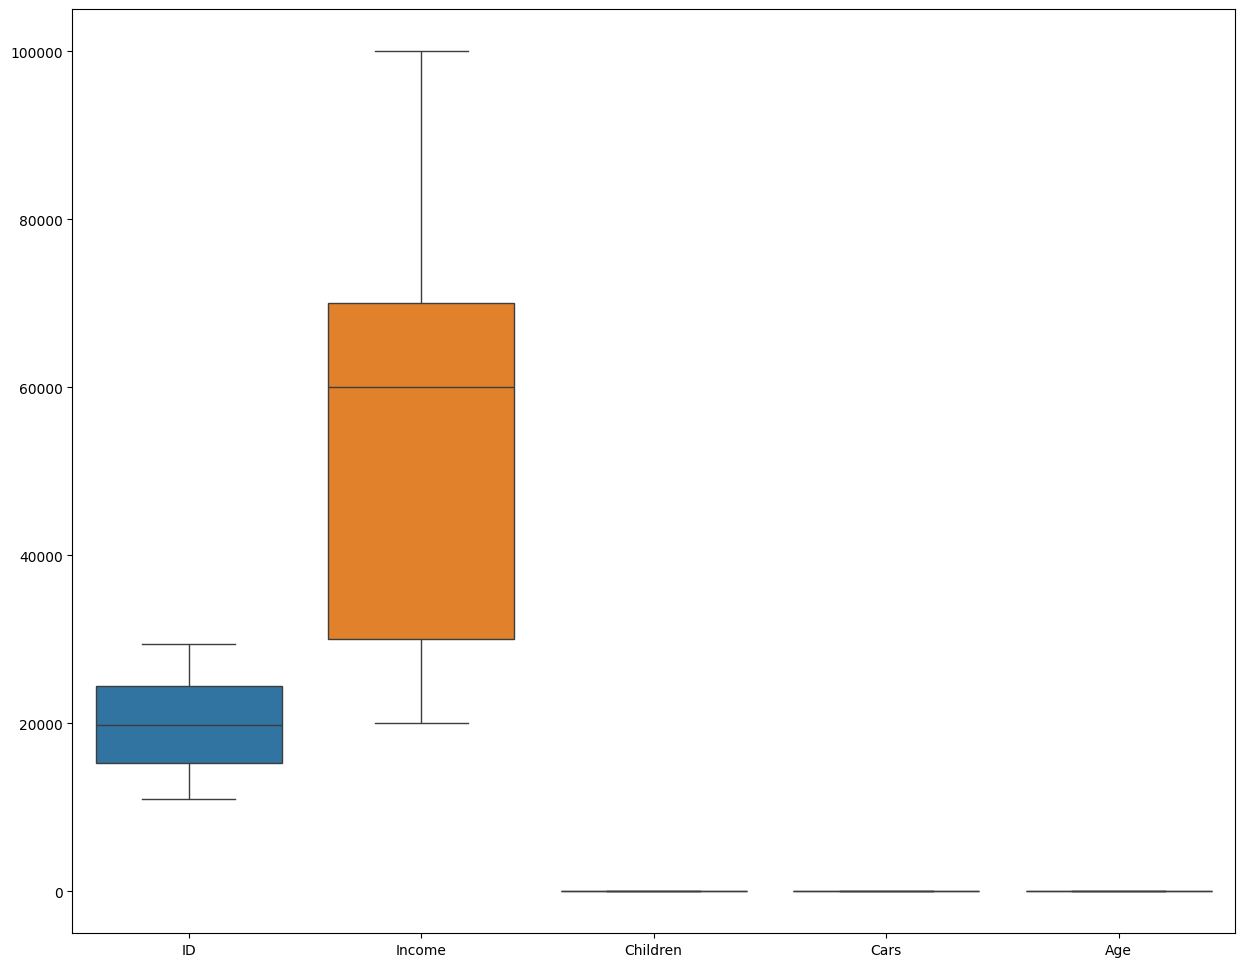

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[['ID','Income','Children','Home Owner','Cars','Commute','Age']])

## Label Encoding

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder=preprocessing.LabelEncoder()

In [ ]:

df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Purchased']= label_encoder.fit_transform(df['Purchased'])
df['Commute']= label_encoder.fit_transform(df['Commute'])
df['Home Owner']= label_encoder.fit_transform(df['Home Owner'])
df.head()
#0 for female and 1 for male
#0-No &1-yes

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute,Region,Age,Purchased
0,12496,Married,0,40000.0,1.0,Bachelors,Skilled Manual,1,0.0,0,Europe,42.0,0
1,24107,Married,1,30000.0,3.0,Partial College,Clerical,1,1.0,0,Europe,43.0,0
2,14177,Married,1,80000.0,4.0,Partial College,Professional,0,2.0,3,Europe,60.0,0
3,24381,Single,1,70000.0,0.0,Bachelors,Professional,1,1.0,4,Pacific,41.0,1
4,25597,Single,1,30000.0,0.0,Bachelors,Clerical,0,0.0,0,Europe,36.0,1


## Univariate Analysis

Count Plot

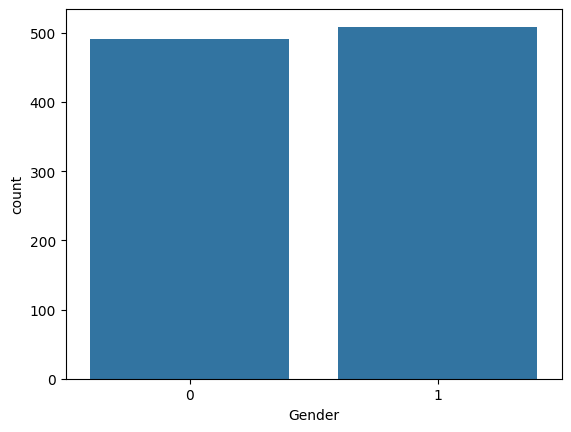

In [ ]:
# Create a count plot for the 'Gender' column
sns.countplot(data=df, x='Gender')

# Show the plot
plt.show()

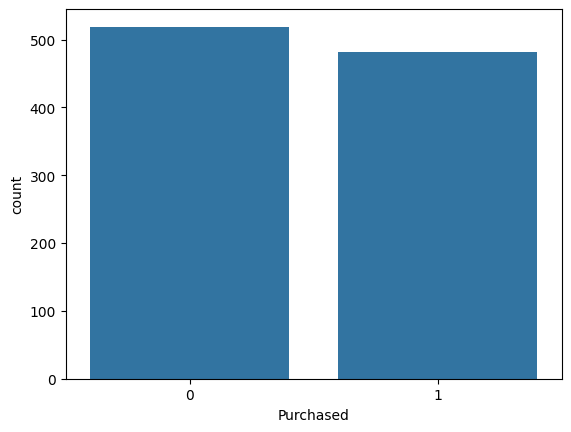

In [ ]:
# Create a count plot for the 'Gender' column
sns.countplot(data=df, x='Purchased')

# Show the plot
plt.show()

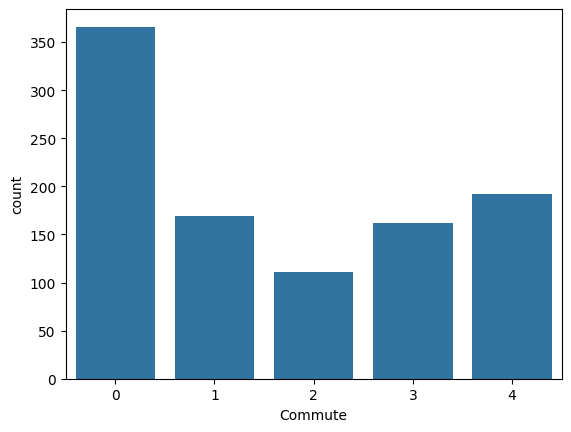

In [ ]:
# Create a count plot for the 'Gender' column
sns.countplot(data=df, x='Commute')

# Show the plot
plt.show()

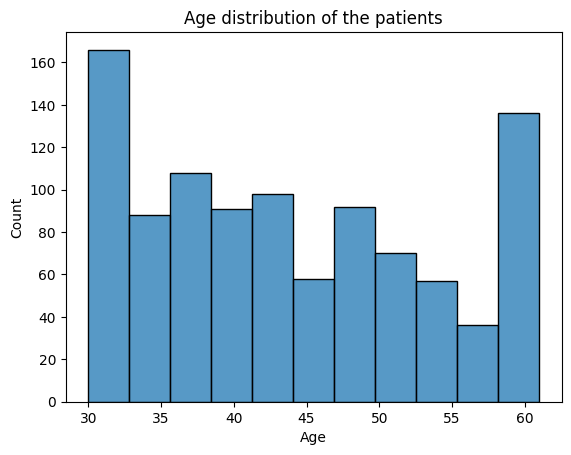

In [ ]:
#Age
sns.histplot(df.Age)
plt.title('Age distribution of the patients')
plt.savefig('age.png')
plt.show()

# Bivariate analysis

Bar Plot

<Axes: xlabel='Income', ylabel='Age'>

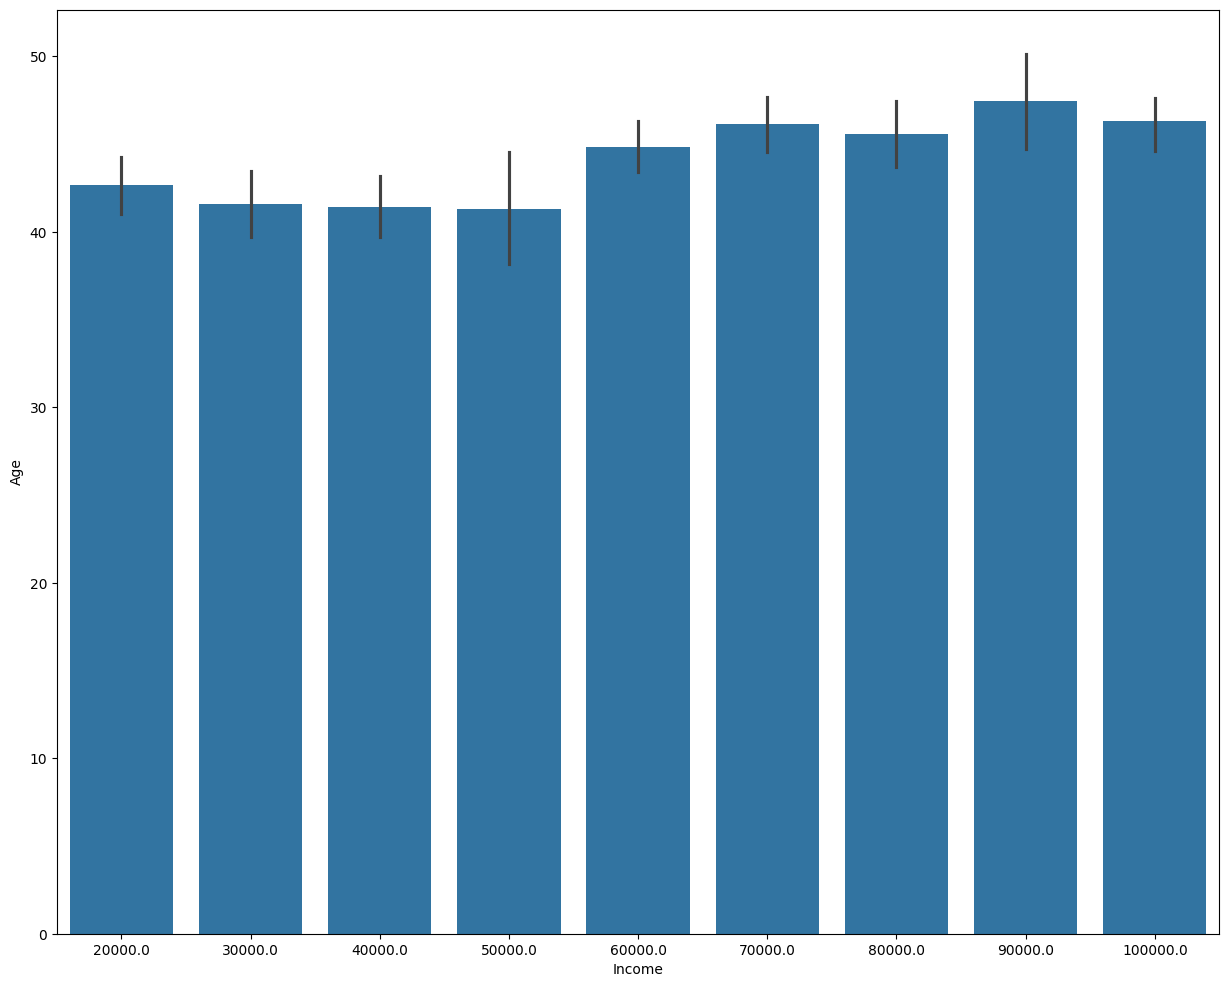

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x='Income',y='Age',data=df)


<Axes: xlabel='Commute', ylabel='Age'>

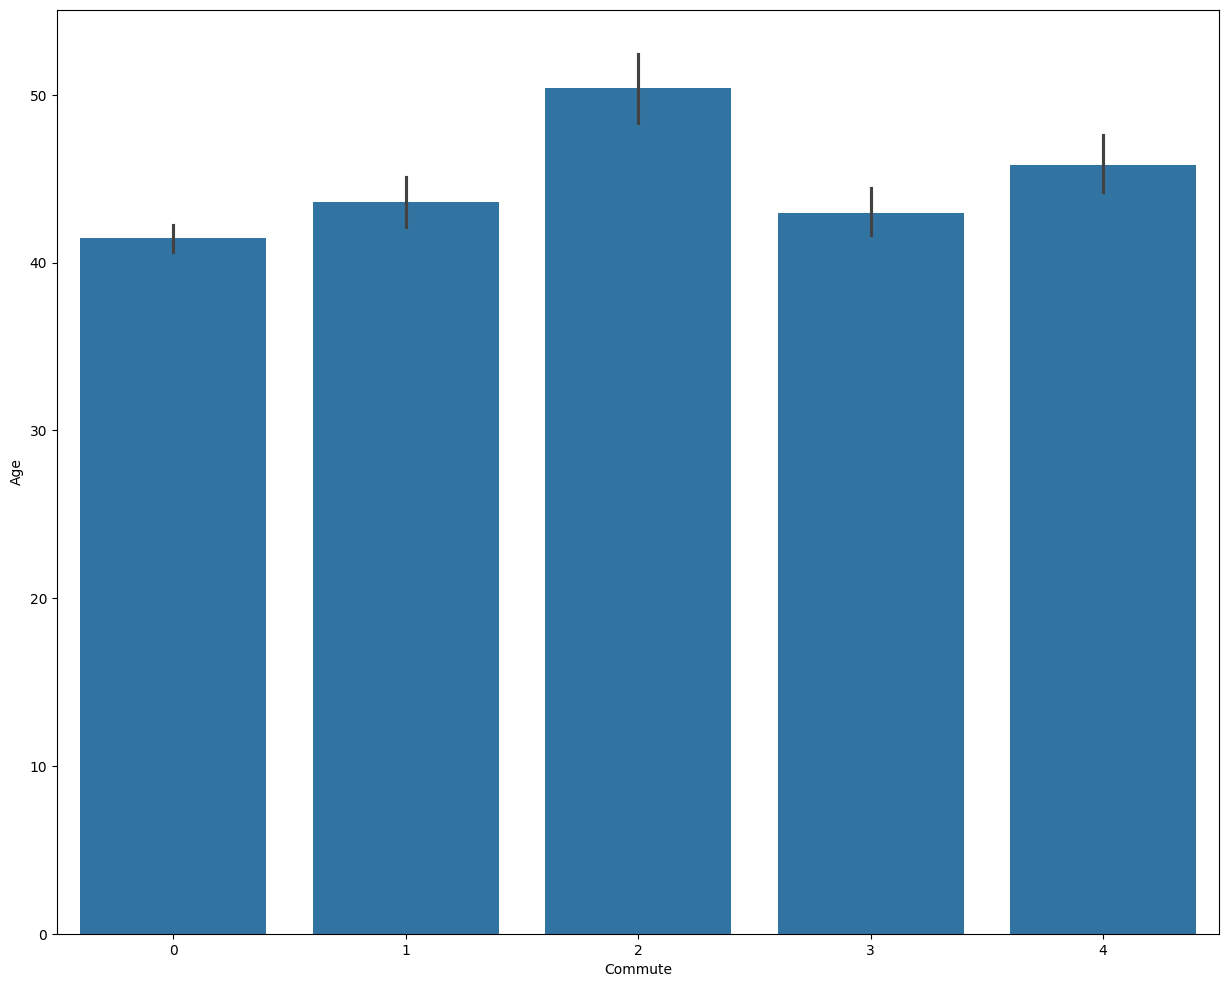

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x='Commute',y='Age',data=df)

<Axes: xlabel='Purchased', ylabel='Commute'>

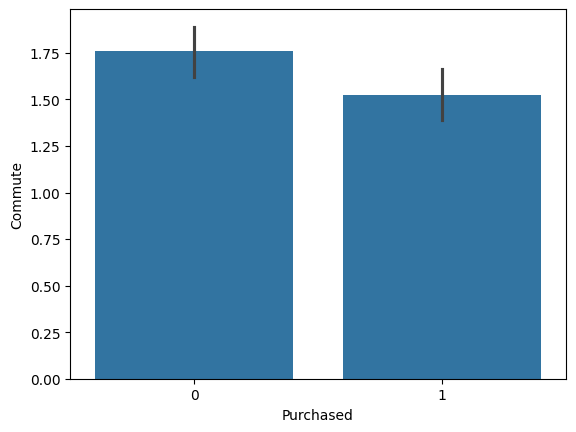

In [ ]:
sns.barplot(x='Purchased',y='Commute',data=df)

<Axes: xlabel='Age', ylabel='Income'>

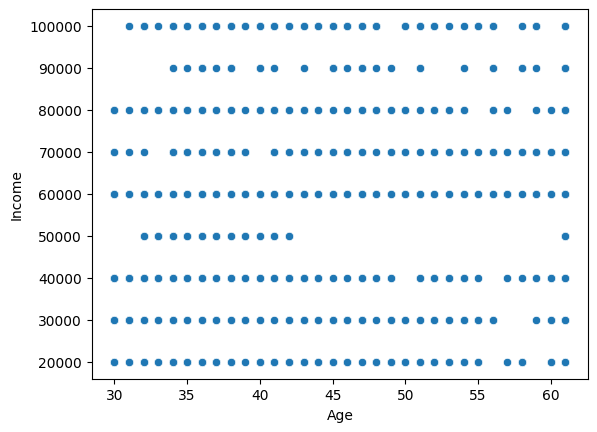

In [ ]:
sns.scatterplot(x='Age',y='Income',data=df)

Pairplot

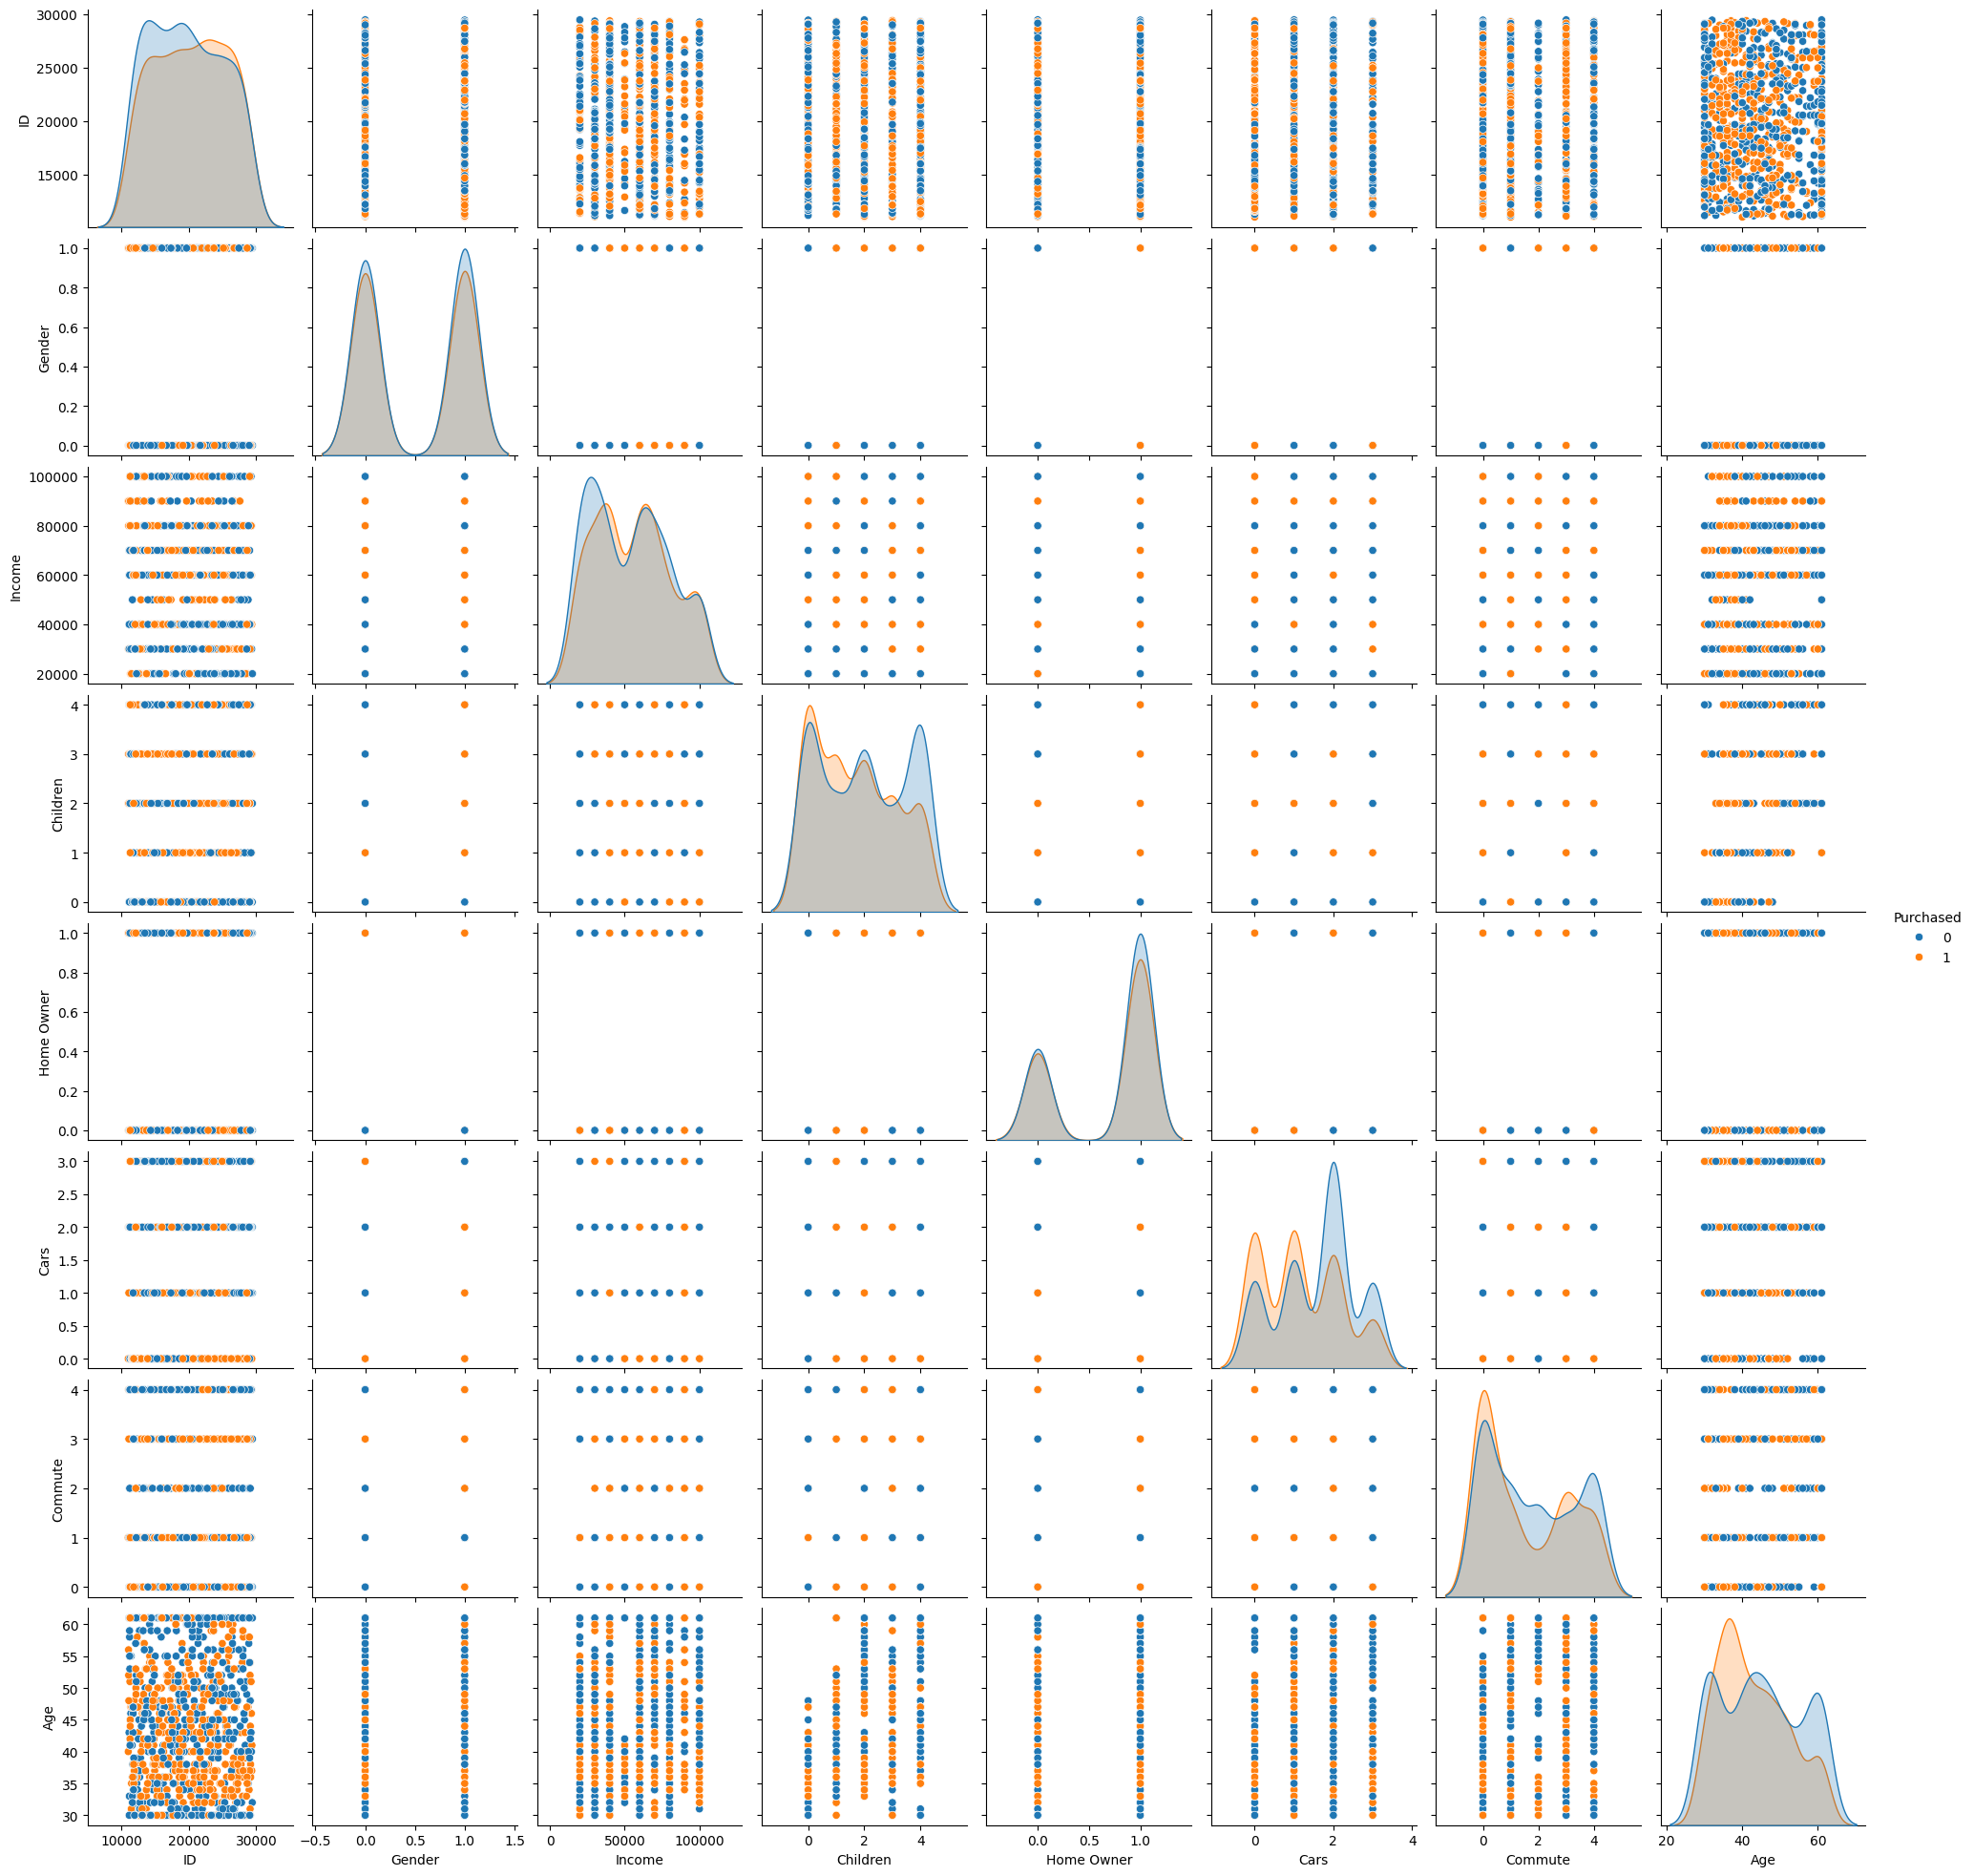

In [ ]:
sns.pairplot(df,hue='Purchased')

Correlation Matrix

Text(0.5, 1.0, 'Correlation map')

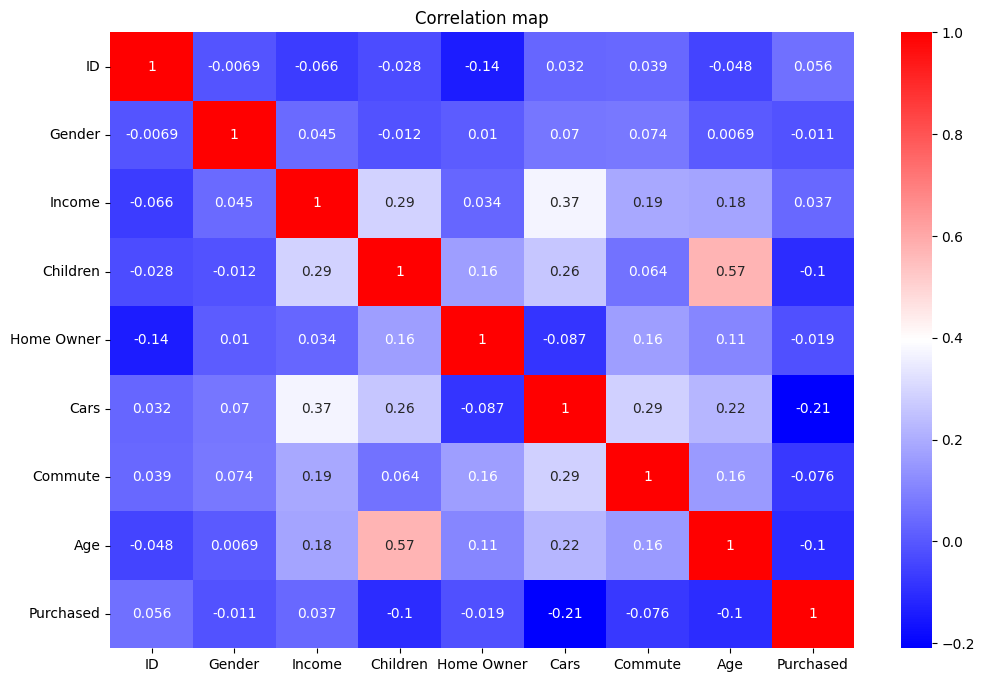

In [ ]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler  # Standarization
# from sklearn.preprocessing import MinMaxScaler  # Normalization

scale = StandardScaler()
# scale = MinMaxScaler()
df[['Age','Income',]]=scale.fit_transform(df[['Age','Income']])

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [ ]:
feature_cols = ['Income','Cars','Age','Commute']
X = df[feature_cols] # Features
y = df['Purchased'] # Target variable

In [ ]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Purchased, Length: 1000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [ ]:
X_train.shape

(800, 4)

In [ ]:
 X_test.shape

(200, 4)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#taking income as independent var
feature_cols = ['Income']
x = df[feature_cols] # Features
y = df.Purchased # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 6)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(750, 1)
(750,)
(250, 1)
(250,)


Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
my_first_model = LinearRegression()

In [ ]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
my_first_model.coef_

array([0.02287328])

In [ ]:
my_first_model.intercept_

0.49058592010995744

In [ ]:
Pred = my_first_model.predict(X_test)

In [ ]:
Pred

array([0.51316804, 0.47728068, 0.49522436, 0.47728068, 0.51316804,
       0.47728068, 0.46830884, 0.46830884, 0.5041962 , 0.48625252,
       0.48625252, 0.51316804, 0.49522436, 0.5041962 , 0.49522436,
       0.53111172, 0.5041962 , 0.49522436, 0.459337  , 0.47728068,
       0.51316804, 0.49522436, 0.46830884, 0.49522436, 0.47728068,
       0.48625252, 0.46830884, 0.459337  , 0.5041962 , 0.47728068,
       0.53111172, 0.47728068, 0.46830884, 0.49522436, 0.52213988,
       0.459337  , 0.47728068, 0.459337  , 0.51316804, 0.52213988,
       0.46830884, 0.51316804, 0.47728068, 0.47728068, 0.46830884,
       0.47728068, 0.49522436, 0.459337  , 0.49522436, 0.5041962 ,
       0.51316804, 0.47728068, 0.5041962 , 0.53111172, 0.46830884,
       0.459337  , 0.46830884, 0.459337  , 0.49522436, 0.459337  ,
       0.46830884, 0.5041962 , 0.47728068, 0.47728068, 0.459337  ,
       0.459337  , 0.53111172, 0.46830884, 0.5041962 , 0.49522436,
       0.49522436, 0.49522436, 0.5041962 , 0.46830884, 0.53111

In [ ]:
y_test

978    0
22     1
909    1
399    1
438    1
      ..
395    1
359    0
707    1
444    0
722    0
Name: Purchased, Length: 250, dtype: int64

Evaluation on Train Data

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
my_linear_preds_train = my_first_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(X_train, y_train))

MAE on Train Data : 0.4987504968163739
MSE on Train Data : 0.24937524840818695
RMSE on Train Data : 0.49937485760517314
R-squared on Train Data : 0.0021513115353605228


Evaluation on Test Data

In [ ]:
my_model_preds = my_first_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', my_first_model.score(X_test, y_test))

MAE on Train Data : 0.4989673409386895
MSE on Train Data : 0.2495403342800382
RMSE on Train Data : 0.49954012279299265
R-squared on Train Data : -0.007445959079025011


## K nearest neighbour(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict(X_test)

# Predictions and Evaluation

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[60 77]
 [57 56]]


In [ ]:
print(accuracy_score(y_test,pred))

0.464


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.51      0.44      0.47       137
           1       0.42      0.50      0.46       113

    accuracy                           0.46       250
   macro avg       0.47      0.47      0.46       250
weighted avg       0.47      0.46      0.46       250



### Choosing a K Value

In [ ]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy_rate.append(score)


In [ ]:
accuracy_rate

[0.492,
 0.568,
 0.464,
 0.512,
 0.46,
 0.512,
 0.436,
 0.536,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.516,
 0.536,
 0.544,
 0.564,
 0.564,
 0.532,
 0.564,
 0.588,
 0.568,
 0.56,
 0.536,
 0.536,
 0.54,
 0.56,
 0.536,
 0.564,
 0.54,
 0.536,
 0.564,
 0.536]

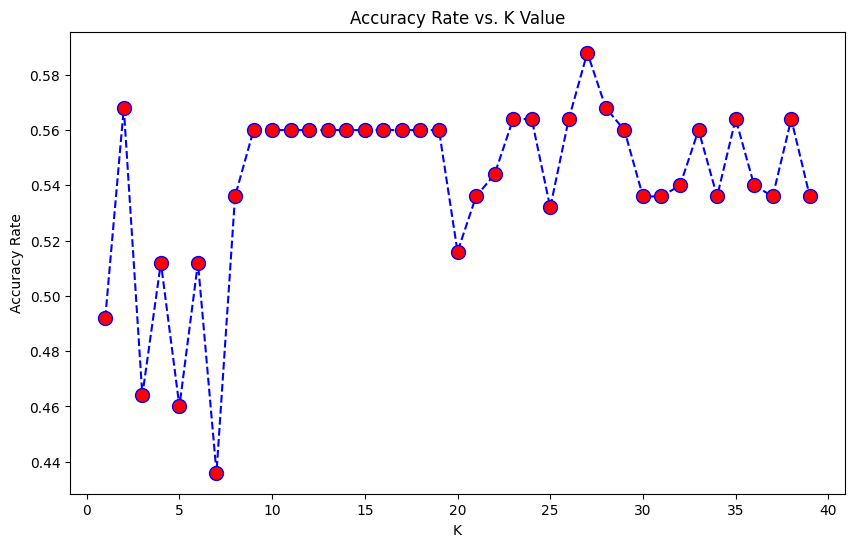

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

Logistic Regression Algorithm

In [ ]:
df['Purchased'].value_counts()

0    519
1    481
Name: Purchased, dtype: int64

In [ ]:
columns_to_drop = ['Marital Status','Education']

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
y_test

978    0
22     1
909    1
399    1
438    1
      ..
395    1
359    0
707    1
444    0
722    0
Name: Purchased, Length: 250, dtype: int64

Metrics for evaluation

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.496

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[83, 54],
       [72, 41]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57       137
           1       0.43      0.36      0.39       113

    accuracy                           0.50       250
   macro avg       0.48      0.48      0.48       250
weighted avg       0.49      0.50      0.49       250



Decision Tree Algorithm

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
def mymodel(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit your model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.71      0.68       106
           1       0.64      0.57      0.60        94

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.65      0.64       200



### hyperparameter tunning

In [ ]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       106
           1       0.64      0.57      0.60        94

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.65      0.64       200



DecisionTreeClassifier(max_depth=10)

In [ ]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(X_train,y_train)
    ypred=dt2.predict(X_test)
    print(f"{i}: {accuracy_score(y_test,y_pred)}")

1: 0.645
2: 0.645
3: 0.645
4: 0.645
5: 0.645
6: 0.645
7: 0.645
8: 0.645
9: 0.645
10: 0.645
11: 0.645
12: 0.645
13: 0.645
14: 0.645
15: 0.645
16: 0.645
17: 0.645
18: 0.645
19: 0.645
20: 0.645
21: 0.645
22: 0.645
23: 0.645
24: 0.645
25: 0.645
26: 0.645
27: 0.645
28: 0.645
29: 0.645
30: 0.645
31: 0.645
32: 0.645
33: 0.645
34: 0.645
35: 0.645
36: 0.645
37: 0.645
38: 0.645
39: 0.645
40: 0.645
41: 0.645
42: 0.645
43: 0.645
44: 0.645
45: 0.645
46: 0.645
47: 0.645
48: 0.645
49: 0.645


In [ ]:
dt3=DecisionTreeClassifier(max_depth=11)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       106
           1       0.64      0.57      0.60        94

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.65      0.64       200



DecisionTreeClassifier(max_depth=11)

In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       106
           1       0.64      0.57      0.60        94

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.65      0.64       200



DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(X_train,y_train)
    ypred=dt2.predict(X_test)
    print(f"{i}: {accuracy_score(y_test,y_pred)}")

1: 0.645
2: 0.645
3: 0.645
4: 0.645
5: 0.645
6: 0.645
7: 0.645
8: 0.645
9: 0.645
10: 0.645
11: 0.645
12: 0.645
13: 0.645
14: 0.645
15: 0.645
16: 0.645
17: 0.645
18: 0.645
19: 0.645
20: 0.645
21: 0.645
22: 0.645
23: 0.645
24: 0.645
25: 0.645
26: 0.645
27: 0.645
28: 0.645
29: 0.645
30: 0.645
31: 0.645
32: 0.645
33: 0.645
34: 0.645
35: 0.645
36: 0.645
37: 0.645
38: 0.645
39: 0.645
40: 0.645
41: 0.645
42: 0.645
43: 0.645
44: 0.645
45: 0.645
46: 0.645
47: 0.645
48: 0.645
49: 0.645
50: 0.645
51: 0.645
52: 0.645
53: 0.645
54: 0.645
55: 0.645
56: 0.645
57: 0.645
58: 0.645
59: 0.645
60: 0.645
61: 0.645
62: 0.645
63: 0.645
64: 0.645
65: 0.645
66: 0.645
67: 0.645
68: 0.645
69: 0.645
70: 0.645
71: 0.645
72: 0.645
73: 0.645
74: 0.645


In [ ]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=41)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       106
           1       0.64      0.57      0.60        94

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.65      0.64       200



DecisionTreeClassifier(min_samples_leaf=41)

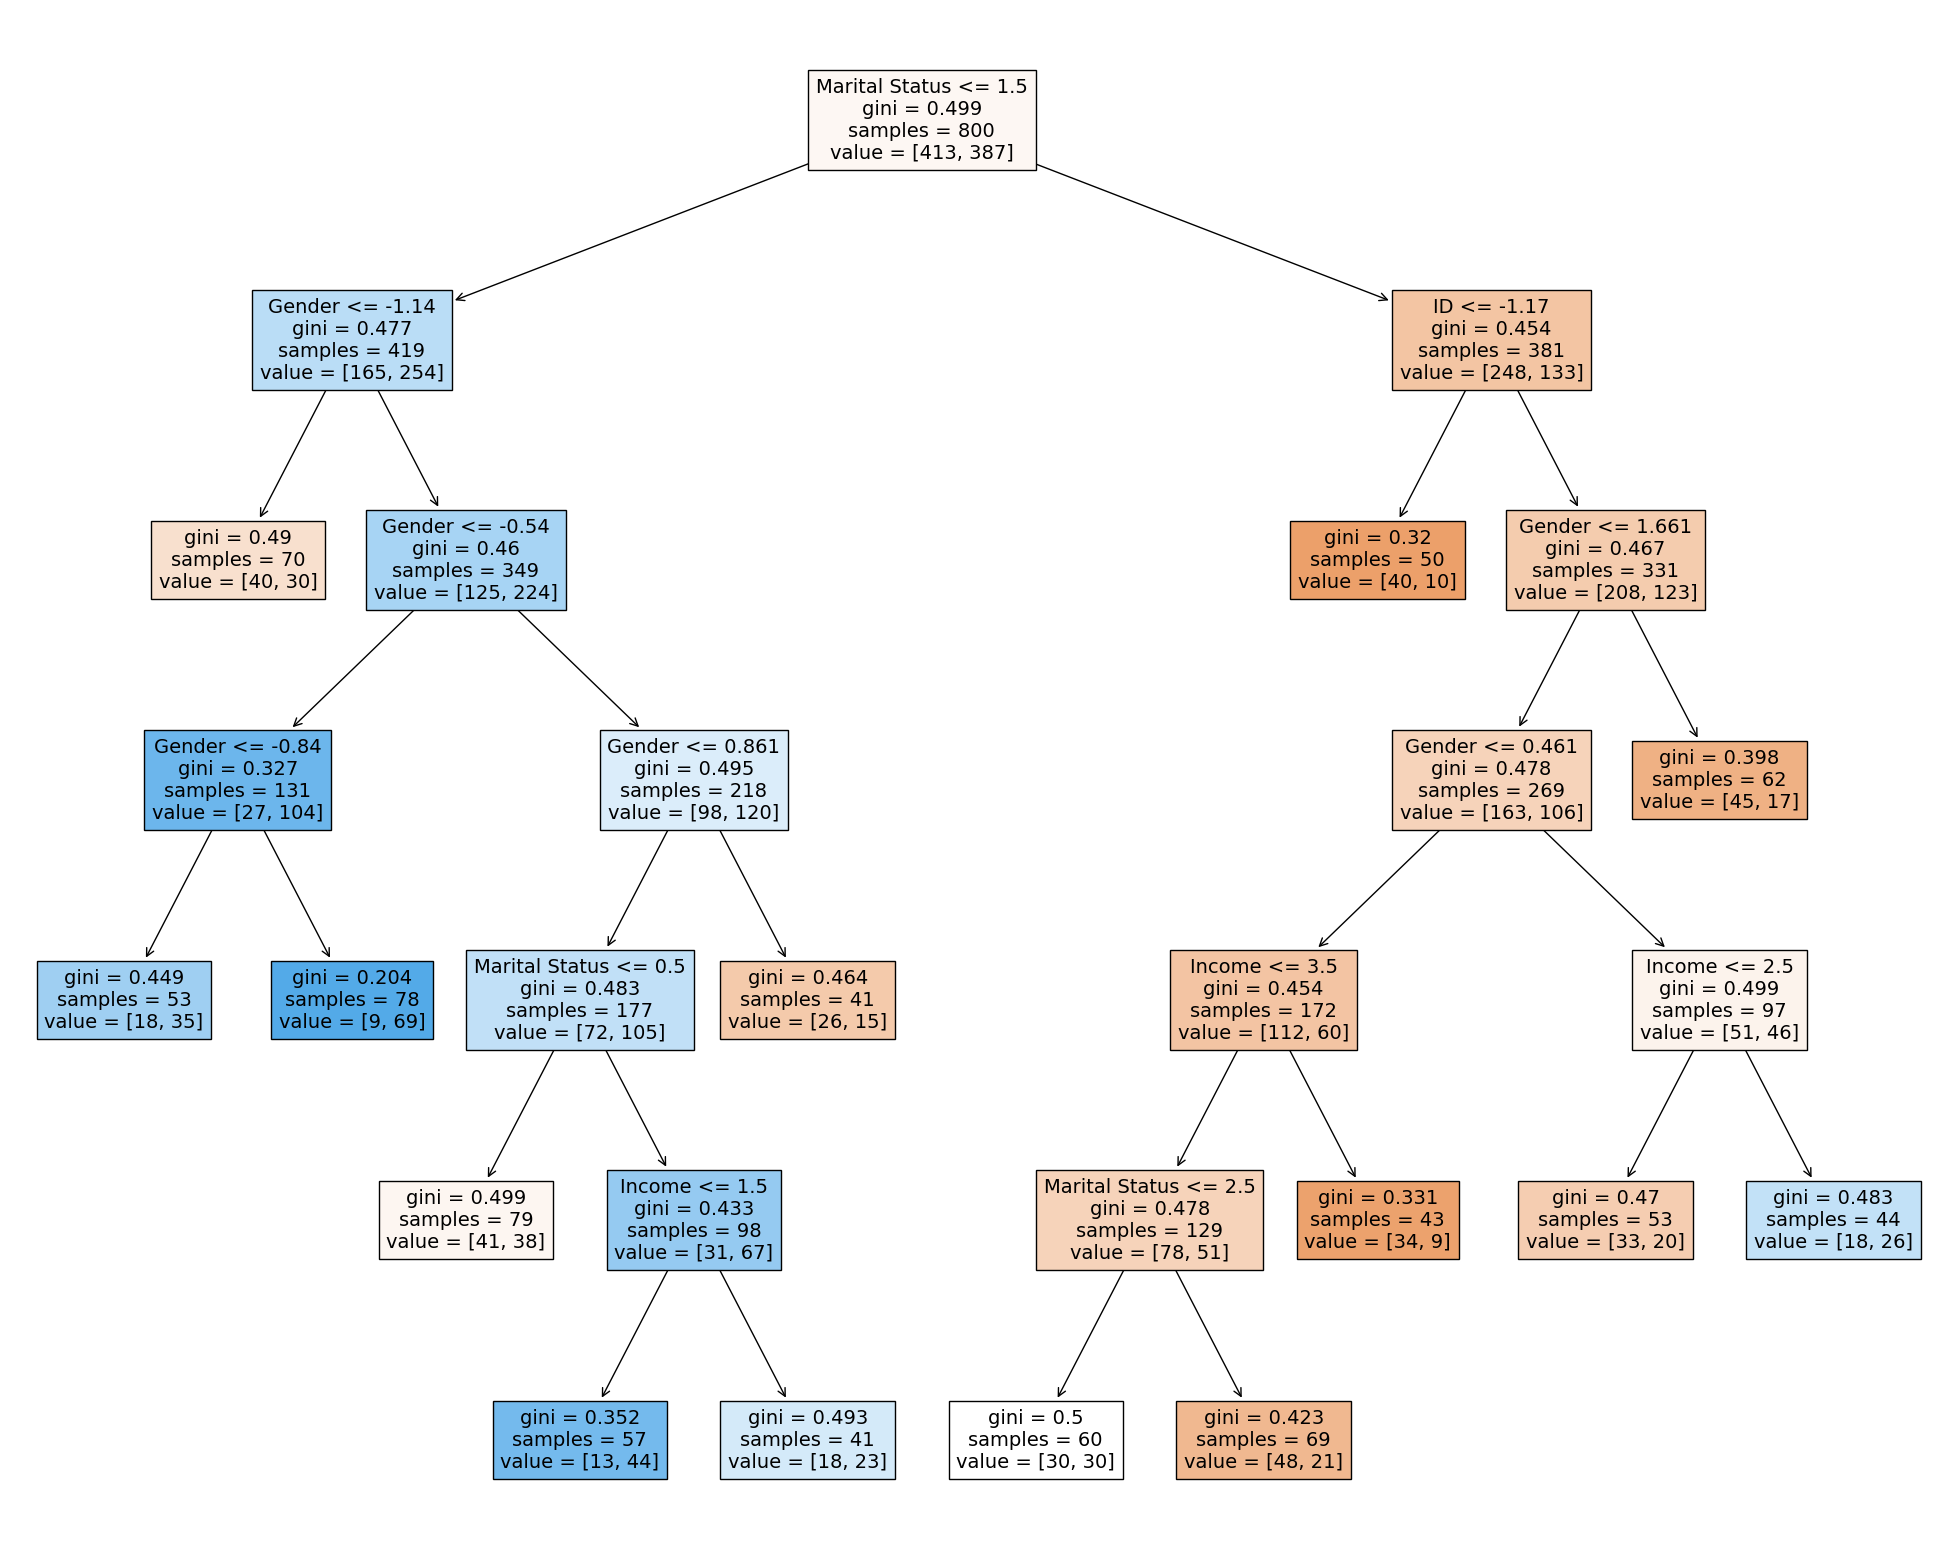

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(dt6,filled=True,feature_names=x.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}

In [ ]:
my_best_preds = grid_search.predict(X_test)

In [ ]:
accuracy_score(y_test, my_best_preds)

0.595

Label Encoding of remaining attributes having string values

In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute,Region,Age,Purchased
0,12496,Married,0,-0.581693,1.0,Bachelors,Skilled Manual,1,0.0,0,Europe,-0.189602,0
1,24107,Married,1,-0.973934,3.0,Partial College,Clerical,1,1.0,0,Europe,-0.089548,0
2,14177,Married,1,0.987271,4.0,Partial College,Professional,0,2.0,3,Europe,1.611371,0
3,24381,Single,1,0.595030,0.0,Bachelors,Professional,1,1.0,4,Pacific,-0.289656,1
4,25597,Single,1,-0.973934,0.0,Bachelors,Clerical,0,0.0,0,Europe,-0.789927,1


In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['Marital Status']= label_encoder.fit_transform(df['Marital Status'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Occupation']= label_encoder.fit_transform(df['Occupation'])
df['Home Owner']= label_encoder.fit_transform(df['Home Owner'])
df['Commute']= label_encoder.fit_transform(df['Commute'])
df['Purchased']= label_encoder.fit_transform(df['Purchased'])
df['Region']= label_encoder.fit_transform(df['Region'])
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute,Region,Age,Purchased
0,12496,0,0,-0.581693,1.0,0,4,1,0.0,0,0,-0.189602,0
1,24107,0,1,-0.973934,3.0,3,0,1,1.0,0,0,-0.089548,0
2,14177,0,1,0.987271,4.0,3,3,0,2.0,3,0,1.611371,0
3,24381,1,1,0.595030,0.0,0,3,1,1.0,4,2,-0.289656,1
4,25597,1,1,-0.973934,0.0,0,0,0,0.0,0,0,-0.789927,1


In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute,Region,Age,Purchased
0,12496,0,0,-0.581693,1.0,0,4,1,0.0,0,0,-0.189602,0
1,24107,0,1,-0.973934,3.0,3,0,1,1.0,0,0,-0.089548,0
2,14177,0,1,0.987271,4.0,3,3,0,2.0,3,0,1.611371,0
3,24381,1,1,0.595030,0.0,0,3,1,1.0,4,2,-0.289656,1
4,25597,1,1,-0.973934,0.0,0,0,0,0.0,0,0,-0.789927,1


Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB  #for multiclass

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df.Purchased.value_counts()

0    519
1    481
Name: Purchased, dtype: int64

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [ ]:
NB_model_B = BernoulliNB()

In [ ]:
mymodel(NB_model_B)

              precision    recall  f1-score   support

           0       0.58      0.66      0.62       153
           1       0.59      0.50      0.54       147

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.58      0.58       300



BernoulliNB()

In [ ]:
NB_model_G= GaussianNB()

In [ ]:
mymodel(NB_model_G)

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       153
           1       0.64      0.56      0.59       147

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.62       300
weighted avg       0.63      0.63      0.62       300



GaussianNB()

In [ ]:
le = preprocessing.LabelEncoder()
df = df[['Marital Status','Gender','Education','Occupation','Home Owner','Commute','Purchased']].apply(le.fit_transform)
df.head()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute,Purchased
0,0,0,0,4,1,0,0
1,0,1,3,0,1,0,0
2,0,1,3,3,0,3,0
3,1,1,0,3,1,4,1
4,1,1,0,0,0,0,1


## Support Vector Machine(SVM) classification

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature_cols = ['Marital Status','Gender','Education','Occupation','Home Owner','Commute']
X = df[feature_cols]
y = df.Purchased

In [ ]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Purchased, Length: 1000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
X_train.shape

(600, 6)

In [ ]:
 X_test.shape

(400, 6)

Polynomial kernel

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="poly")
classifier.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

RBF kernel

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.56

Sigmoid kernel

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="sigmoid")
classifier.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.505

## Adaboost Classificaation

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100)


In [ ]:
clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)

0.5625

## Quadratic Discriminant Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
#define predictor and response variables
X = df[['Marital Status','Gender','Education','Occupation','Home Owner','Commute']]
y = df['Purchased' ]

In [ ]:
#Fit the QDA model
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [ ]:
#Method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.5476666666666666


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
#define predictor and response variables
X = df[['Marital Status','Gender','Education','Occupation','Home Owner','Commute']]
y = df['Purchased' ]